**Временное уравнение Шредингера**

-------

$$i \hbar \frac{\partial \Psi(\vec{r}, t)}{\partial t} = H(\vec{r}, t) \Psi(\vec{r}, t)$$

Множество реальных физических задач имеют изменяющиеся во времени параметры/характеристики (возбуждение эл., магн., полем, механическое воздействие и т.д.). Однако решение временных уравнений Шредингера довольно непростая задача, поэтому обычно рассматривают начальное и конечное стационарные состояния системы.

Вид временного уравнения довольно простой и на самом деле более понятный, чем стационарное уравнение. Скажем для осцилятора временное уравнение имело бы форму:

### $ i \hbar \frac{\partial \Psi(x, t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x, t)}{\partial x^2} + \frac{kx^2\Psi(x, t)}{2}$

---
*Что за уравнение?*

*Какое условие мы должны поставить?*

---

**Двухуровневая система**

---

При рассмотрении атомов, молекул, полупроводников часто рассматривают лишь два ближайших уровня - основное состояние и первое возбужденное. Это хорошая модель при небольших возмущениях, когда система возбуждается слабо. Рассмотрим двухуровневую систему:

![2 lvl](data/3.png)

Гамильтониан модели записывают в виде:

$
H =
\begin{pmatrix}
0 & V(t) \\
V^*(t) & Е  \\
\end{pmatrix}
$

Здесь V отвечает за вероятность перехода между уровнями при поглощении фотона, а $Е$ - энергия между уровнями. Вероястность перехода можно рассматривать "классически", тогда V линейно зависит от поля и изменяется во времени также.

---
*Какова дискритезация по пространству?*

*Как выглядит ВФ системы?*

---

Интерес представляет реакция системы на подваваемое поле, его спектр излучения/поглощения. Решение такой задачи еще каких-то 30 лет назад представляло научный интерес:

![image.png](data/1.png)

---
Однако, и сегодня изучаются такие системы, но уже многоуровневые:
![image.png](2.png)

---
**Решение временного уравнения Шредингера для двухуровневой системы**

---
Мы уже решали с вами дифференциальные уравнения для частицы в поле, однако теперь функция многомерная (в данном случае двумерная - время и координата) и кроме того комлпексная.

Для ее решения( и для решения куда более сложных научных задач связанных с оптическим возбуждением) существует библиотека Qutip. На лекции мы не будем разбирать, каким методом решается временное уравнение Шредингера, просто проанализируем решения.

*Информация: На данной лекции я воспользуюсь библиотекой Qutip, однако в дальнейшем, для решения домашек или других лекций, она вам не понадобится, поэтому можете не ставить её, в лекции она используется лишь как инструмент решения *

In [133]:
# Если хотите поставить qutip
!pip install qutip

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [134]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qp

In [297]:
E = 1
H0 = np.eye(2) * np.array([0, E])
H0 = qp.Qobj(H0)

In [298]:
H0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

(-0.1, 200.0)

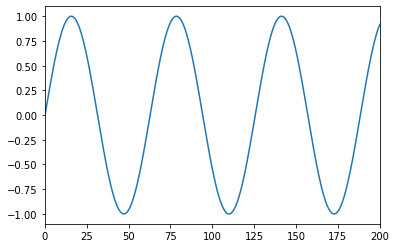

In [300]:
t = np.arange(0, 2000, 0.1)
A = 1
w = 0.1
V = A * np.sin(w * t)
plt.plot(t, V)
plt.xlim(-0.1, 200)

In [301]:
T = np.zeros((2, 2))
T[0, 1] = 1
T[1, 0] = 1
T = qp.Qobj(T)
T

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [302]:
psi0 = qp.fock(2)
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [303]:
dyn = qp.mesolve(H=[H0,[T, V]], rho0=psi0, tlist=t, progress_bar=True)
psit = dyn.states

10.0%. Run time:   0.51s. Est. time left: 00:00:00:04
20.0%. Run time:   1.00s. Est. time left: 00:00:00:03
30.0%. Run time:   1.51s. Est. time left: 00:00:00:03
40.0%. Run time:   2.06s. Est. time left: 00:00:00:03
50.0%. Run time:   2.56s. Est. time left: 00:00:00:02
60.0%. Run time:   3.08s. Est. time left: 00:00:00:02
70.0%. Run time:   3.72s. Est. time left: 00:00:00:01
80.0%. Run time:   4.24s. Est. time left: 00:00:00:01
90.0%. Run time:   4.75s. Est. time left: 00:00:00:00
Total run time:   5.24s


In [304]:
psi = np.zeros((2,1, t.size), dtype= np.complex128)
for i,fi in enumerate(psit):
    psi[:,:, i] = fi

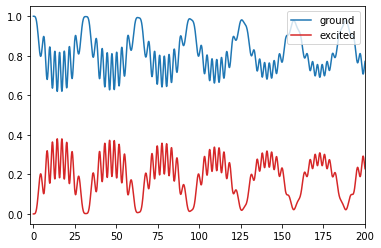

In [305]:
plt.plot(t, np.abs(psi[0,0])**2, label = 'ground')
plt.plot(t, np.abs(psi[1,0])**2, color = 'tab:red', label = 'excited')
plt.xlim(-2, 200)
plt.legend(loc = 'upper right')

In [315]:
def smooth(t):
    return 1.-3.*(t/t.max())**2+2.*(t/t.max())**3

def fourier(data, omega, time):
    mas = np.zeros(omega.shape[0])
    for i,w in enumerate(omega):
        mas[i] = np.abs(np.mean(data * np.exp(-1j * time * w) * smooth(time)))**2
    return mas

In [316]:
dt = np.zeros((t.size, 1, 1), dtype=np.complex128)
T = np.array([[0,1], [1,0]])
for i in range(t.size):
    dt[i] = np.conj(psi[:,:,i].T) @ (A * T) @ psi[:,:,i]

In [317]:
dt = dt.flatten()

/home/neverov/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-2.0, 100.0)

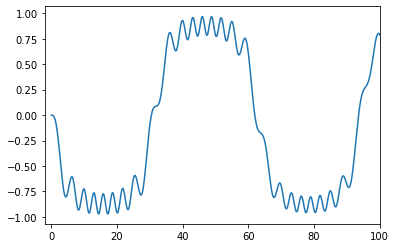

In [318]:
plt.plot(t, dt)
plt.xlim(-2, 100)

In [319]:
omega = np.arange(0, 40, 0.01) * w
dw = fourier(dt, omega, t)

Text(0, 0.5, 'Intensity')

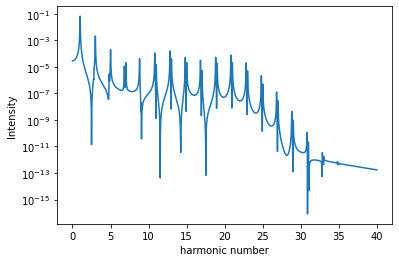

In [321]:
plt.plot(omega / w, dw)
plt.yscale('log')
plt.xlabel('harmonic number')
plt.ylabel('Intensity')

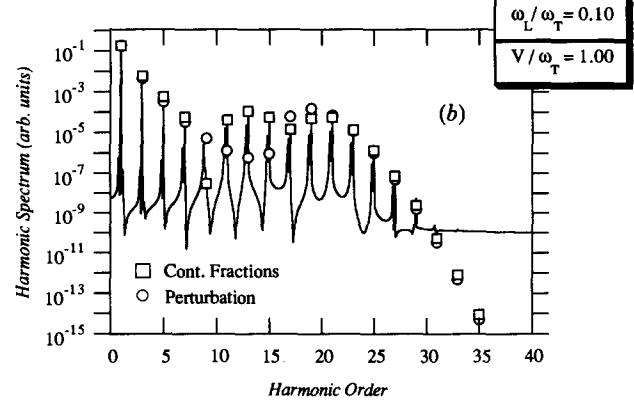

---

**Домашнее задание**

---

В качестве домашнего задания вам нужно будет реализовать Метод Рунге — Кутты, с помощью которого можно решить временную задачу для двухуровневой системы. 

[Метод Рунге — Кутты](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B)

Метод несложный и реализован был множество раз. Ваша задача правильно подставить функцию $f$, которой во временной задаче является гамильтониан, в качестве начального условия возьмите также, что заполнено только основное состояние. Для проверки своего решения можете строить графики из лекции.

Последовательность действий:
* Переписать уравнение в виде $\frac{\partial \Psi(t)}{\partial t} = f(t, \Psi(t)) =\hat{f}(t)\Psi(t)$
* Определить, что является функцией $f$
* Реализовать метод Рунге-Кутты
* Не забывать, что все комплексное
* Не забывать нормировать ВФ внутри метода
* Понять, что провели серьезную научную работу


P.S. Как обычно считайте $\hbar = 1$